weights: [[ 1.01737646]
 [ 0.54582835]
 [ 1.19785499]
 [ 1.63528193]
 [-0.98214962]
 [ 1.43137354]
 [ 4.31677761]
 [ 4.63837746]
 [ 2.05017779]
 [-3.50678046]
 [ 2.22204425]
 [ 0.71096666]
 [ 1.58060598]
 [ 1.44394465]
 [-0.54802797]
 [-1.94414242]
 [-0.20855228]
 [ 0.47589395]
 [ 0.25771994]
 [-1.88142959]
 [ 2.87041691]
 [ 2.45081925]
 [ 2.46371069]
 [ 2.45420166]
 [ 0.2372642 ]
 [ 0.80962563]
 [ 2.69141892]
 [ 4.51105509]
 [ 2.26219871]
 [-0.9521799 ]]
bias: -9.652181342577492
Predicted output: [0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
Actual output: [0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0]
Confusion Matrix:
[[34  0]
 [ 1 22]]
Accuracy: 0.9824561403508771
Precision: 0.9714285714285714
Recall: 1.0


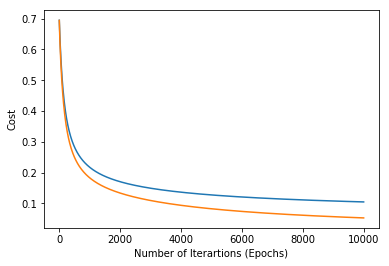

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

#reading .csv file and storing it in a dataframe
cancer_data = pd.read_csv('wdbc.csv')

#data cleansing
cancer_data.drop(['A1'], axis = 1,inplace=True)
cancer_data.B1 = [1 if each == "M" else 0 for each in cancer_data.B1]

#storing target values into y and field values into x
y = cancer_data.B1.values
x_data = cancer_data.drop(['B1'], axis = 1)

#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

#partitioning
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( 
    x, y, test_size = 0.1, random_state = 1) 
x_train, x_validate, y_train, y_validate = train_test_split( 
    x_train, y_train, test_size = 0.1, random_state = 1)

x_train = x_train.T
x_validate = x_validate.T
x_test = x_test.T 
y_train = y_train.T
y_validate = y_validate.T
y_test = y_test.T 

#assigning weights and bias
w = np.random.randn(x_train.shape[0], 1)*0.01 
b = 0

#sigmoidal function
def sigmoid(z): 
    y_head = 1/(1 + np.exp(-z)) 
    return y_head

#cost function
def cost1(w, b, x_train, y_train): 
    z = np.dot(w.T, x_train) + b 
    y_head = sigmoid(z) 
    loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)  
    cost = (np.sum(loss)) / x_train.shape[1]       
    derivative_weight = (np.dot(x_train, ( 
        (y_head - y_train).T))) / x_train.shape[1]  
    derivative_bias = np.sum( 
        y_head-y_train) / x_train.shape[1]                  
    gradients = {"derivative_weight": derivative_weight, 
                 "derivative_bias": derivative_bias} 
    return cost, gradients

#Gradient descent
learning_rate = 0.1
number_of_iteration = 10000
def update(w, b, x_train, y_train, learning_rate, number_of_iteration): 
    cost_list = [] 
    cost_list2 = [] 
    index = [] 
  
    for i in range(number_of_iteration):  
        cost, gradients = cost1(w, b, x_train, y_train) 
        cost_list.append(cost)   
        w = w - learning_rate * gradients["derivative_weight"] 
        b = b - learning_rate * gradients["derivative_bias"] 
        if i % 10 == 0: 
            cost_list2.append(cost) 
            index.append(i) 
#           print ("Cost after iteration % i: % f" %(i, cost)) 
    parameters = {"weight": w, "bias": b} 
    plt.plot(index, cost_list2) 
#   plt.xticks(index, rotation ='vertical') 
    plt.xlabel("Number of Iterartions (Epochs)") 
    plt.ylabel("Cost") 
#   plt.show() 
    return parameters, gradients, cost_list 

#predict function
def predict(w, b, x_test):  
    z = sigmoid(np.dot(w.T, x_test)+b) 
    Y_prediction = np.zeros((1, x_test.shape[1])) 
  
    # if z is bigger than 0.5, our prediction is sign one (y_head = 1), 
    # if z is smaller than 0.5, our prediction is sign zero (y_head = 0), 
    Y_prediction=[]
    for i in range(z.shape[1]): 
        if z[0, i]<= 0.5: 
            Y_prediction.append(0)
        else: 
            Y_prediction.append(1)
  
    return Y_prediction 

#calling functions
parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, number_of_iteration)
parameters, gradients, cost_list = update(w, b, x_validate, y_validate, learning_rate, number_of_iteration)

y_pred_test = predict(parameters['weight'], parameters['bias'],x_test)

print('weights:', parameters['weight'])
print('bias:', parameters['bias'])

print('Predicted output:', y_pred_test)
print('Actual output:', y_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:')
print(cm)

#calculating accuracy, precision and recall
True_Positive = cm[0][0]
False_Negative = cm[0][1]
False_Positive = cm[1][0]
True_Negative = cm[1][1]
Accuracy = (True_Positive + True_Negative)/(True_Positive + True_Negative + False_Positive + False_Negative)
print('Accuracy:', Accuracy)

Precision = True_Positive/(True_Positive + False_Positive)
print('Precision:', Precision)

Recall = True_Positive/(True_Positive + False_Negative)
print('Recall:', Recall)